In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use("fivethirtyeight")

In [ ]:
data=pd.read_csv("USA_Housing.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [ ]:
data.drop("Address",axis=1,inplace=True)

In [ ]:
from scipy.stats.mstats import skew,normaltest

In [ ]:
for col in data :
  print(col)
  print(data[col].skew())
  plt.figure()
  sns.distplot(data[col])
  plt.show()

-0.0027180649335593944


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


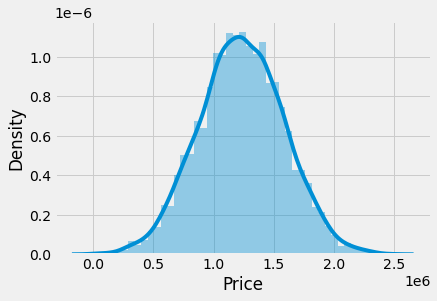

In [ ]:
print(data["Price"].skew())
sns.distplot(data["Price"])
plt.show()

H0 :the target is normally distribution , alpha=0.05 , P_value < 0.05 , reject H0 ,and if p_value > 0.05 accept H0

In [ ]:

normaltest(data["Price"])

NormaltestResult(statistic=0.6184772933479343, pvalue=0.7340055811323609)

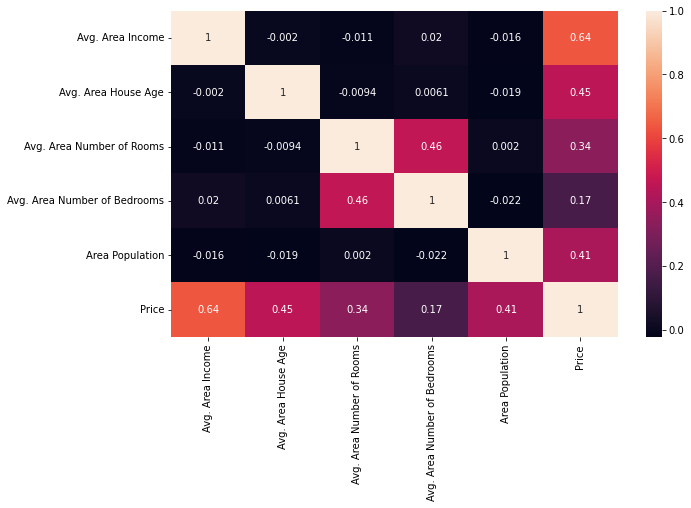

In [ ]:
plt.figure(figsize=(10,6))

sns.heatmap(data.corr(),annot=True)
plt.show()

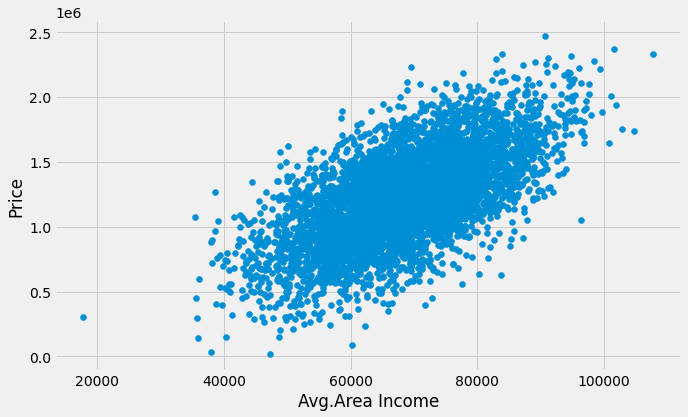

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(data["Avg. Area Income"],data["Price"])
plt.xlabel("Avg.Area Income")
plt.ylabel("Price")
plt.show()

In [ ]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [ ]:
x=data.iloc[:,:-1].values
y=data["Price"].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3 ,random_state=104)

In [ ]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_train_s=s.fit_transform(x_train)
x_test_s=s.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_s,y_train)
y_pred=lr.predict(x_test_s)

In [ ]:
from sklearn import metrics
r2_square = metrics.r2_score(y_test, y_pred)
r2_square 

0.9182594029148625

In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict


In [ ]:
def cross_val(model):
  pred=cross_val_score(model,x,y,cv=7)
  return pred.mean()

In [ ]:
cross_val(lr)

0.9175177534824643

In [ ]:
def evaluate(true,predicted):
  mse = metrics.mean_squared_error(true, predicted)
  r2_square = metrics.r2_score(true, predicted)
  return mse,r2_square

In [ ]:
evaluate(y_test,y_pred)

(10124004268.806562, 0.9182594029148625)

In [ ]:
s=pd.DataFrame(data=[["linear regreesion",*evaluate(y_test,y_pred),cross_val(lr)]],columns=["model","MSE","R2_score","cross_validation"])

In [ ]:
from sklearn.linear_model import Ridge
rd=Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
rd.fit(x_train_s,y_train)
y_pred_rd=rd.predict(x_test_s)

In [ ]:
evaluate(y_test,y_pred_rd)

(10315625264.058775, 0.9167122666089026)

In [ ]:
s1=pd.DataFrame(data=[["Ridge regreesion",*evaluate(y_test,y_pred_rd),cross_val(rd)]],columns=["model","MSE","R2_score","cross_validation"])

In [ ]:
s=s.append(s1)
s

,model,MSE,R2_score,cross_validation
0,linear regreesion,1.031563e+10,0.916712,0.917518
0,Ridge regreesion,1.031563e+10,0.916712,0.917324


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
def Kfold(model):
  kf=KFold(shuffle=True ,random_state=7000,n_splits=5)
  kf.split(x)
  for train_index,test_index in kf.split(x):
  #print("TRAIN:", train_index, "TEST:", test_index)
    x_train_1,x_test_1,y_train_1,y_test_1 =(x[train_index,:],x[test_index,:],y[train_index],y[test_index])
  model.fit(x_train_1,y_train_1)
  ypred_1=model.predict(x_test_1)
  r2_square = metrics.r2_score(y_test_1, ypred_1)
  r2_square

In [ ]:
lr.fit(x_train_1,y_train_1)
ypred_1=lr.predict(x_test_1)
r2_square = metrics.r2_score(y_test_1, ypred_1)
r2_square

0.9190207474669836

In [ ]:
rd.fit(x_train_1,y_train_1)
y_pred_rd1=rd.predict(x_test_1)
r2_square = metrics.r2_score(y_test_1, y_pred_rd1)
r2_square

0.9185326817150385

In [ ]:
def Kfold(model):
  kf=KFold(shuffle=True ,random_state=7000,n_splits=5)
  kf.split(x)
  for train_index,test_index in kf.split(x):
  #print("TRAIN:", train_index, "TEST:", test_index)
    x_train_1,x_test_1,y_train_1,y_test_1 =(x[train_index,:],x[test_index,:],y[train_index],y[test_index])
  model.fit(x_train_1,y_train_1)
  ypred_1=model.predict(x_test_1)
  r2_square = metrics.r2_score(y_test_1, ypred_1)
  return print("r2_square : ",r2_square)

In [ ]:
Kfold(lr)

r2_square :  0.9190207474669836


In [ ]:
Kfold(rd)

r2_square :  0.9185326817150385
